In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("orders_with_issues.csv")


In [10]:
# Standardize text columns
df["Category"] = df["Category"].str.upper()
df["Region"] = df["Region"].str.strip().str.title()

In [11]:
# Convert Data Types
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y", errors="coerce")
df["ship_date"] = pd.to_datetime(df["ship_date"], format="%d/%m/%Y", errors="coerce")
df["delivery_date"] = pd.to_datetime(df["delivery_date"], format="%d/%m/%Y", errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")

In [12]:
# Handle Missing Values
df["Product Name"] = df["Product Name"].fillna("Unknown")
df["Region"] = df["Region"].fillna("Undefined")
df["Category"] = df["Category"].fillna("Undefined")
df = df.dropna(subset=["Sales", "Quantity"])

In [13]:
# Feature Engineering
df["delivery_days"] = (df["ship_date"] - df["Order Date"]).dt.days

def get_status(x):
    if pd.isna(x):
        return "Unknown"
    elif x > 2:
        return "Late"
    else:
        return "OnTime"

df["DeliveryStatus"] = df["delivery_days"].apply(get_status)
df["delivery_days"] = df["delivery_days"].fillna("Unknown")
df["delivery_date"] = df["delivery_date"].fillna("Not Delivered Yet")
df["ship_date"] = df["ship_date"].fillna("Unknown")

In [14]:
# Export Clean File
df.to_csv("clean_orders.csv", index=False)

In [15]:
# Summary
print("Delivery Status Distribution:")
print(df["DeliveryStatus"].value_counts())

print("\nTop 3 Regions:")
print(df["Region"].value_counts().head(3))

Delivery Status Distribution:
DeliveryStatus
OnTime     2603
Late        888
Unknown      35
Name: count, dtype: int64

Top 3 Regions:
Region
West     887
South    873
East     852
Name: count, dtype: int64


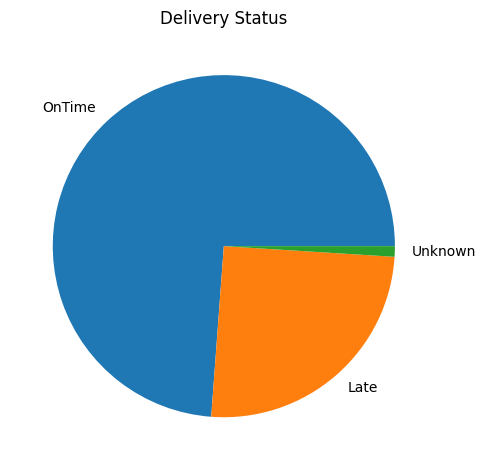

In [16]:
# Visualization
df["DeliveryStatus"].value_counts().plot(kind="pie")
plt.title("Delivery Status")
plt.ylabel("")
plt.tight_layout()
plt.show()